# Betrachtung und Analyse der Lerndaten
Es werden zunächst die Daten Betrachtet, um Besonderheiten zu finden, und sich mit den Daten vertraut zu machen.

In [1]:
from tweet import Tweet
import numpy as np
from csv_handling import load_tweet_csv
import matplotlib.pyplot as plt

Zunächst werden die Daten geladen.

In [2]:
tweets = load_tweet_csv("train.csv", use_pickle=False, use_cache=False)

So sehen die Daten aus:

In [3]:
len(tweets)
tweets[:10]
[t["tweet"] for t in tweets[:5]]

['Jazz for a Rainy Afternoon:  {link}',
 'RT: @mention: I love rainy days.',
 'Good Morning Chicago! Time to kick the Windy City in the nuts and head back West!',
 'Preach lol! :) RT @mention: #alliwantis this type of weather all the time.. I live for beautiful days like this! #minneapolis',
 '@mention good morning sunshine']

Sehen wir uns die Verteilung der Klassen an:

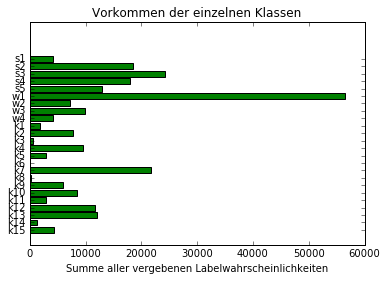

In [4]:
fig, ax = plt.subplots()

classes = Tweet.get_all_keys()
y_pos = np.arange(len(classes))
classes_sum = [0]*len(classes)
for tweet in tweets:
    for i in range(len(classes)):
        classes_sum[i] += tweet[classes[i]]

ax.barh(y_pos, classes_sum, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(classes)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Summe aller vergebenen Labelwahrscheinlichkeiten')
ax.set_title('Vorkommen der einzelnen Klassen')

plt.show()

Wenn die Klassen vorher auf 0 und 1 rediziert werden, sieht das Ergebnis etwas anders aus:

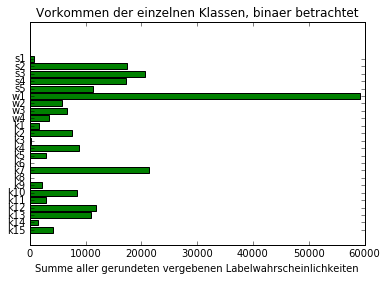

In [5]:
fig, ax = plt.subplots()

classes_bin_sum = [0] * len(classes)
for tweet in tweets:
    for i in range(len(classes)):
        classes_bin_sum[i] += 1 if tweet[classes[i]] > 0.5 else 0

ax.barh(y_pos, classes_bin_sum, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(classes)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Summe aller gerundeten vergebenen Labelwahrscheinlichkeiten')
ax.set_title('Vorkommen der einzelnen Klassen, binaer betrachtet')

plt.show()

Als naechstes soll die Klassenhierarchie betrachtet werden. Sehen wir uns zunaechst die Surchschnittliche Summe der Klassenlabels innerhalb der Oberklassen an.

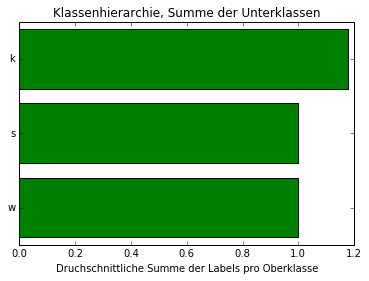

In [6]:
fig, ax = plt.subplots()

class_groups = ["k", "s", "w"]
y_pos = np.arange(len(class_groups))
main_classes_sum = [0] * len(class_groups)
for tweet in tweets:
    for tweet_class in classes:
        main_classes_sum[class_groups.index(tweet_class[0])] += tweet[tweet_class]
main_classes_sum = [grp/len(tweets) for grp in main_classes_sum]

ax.barh(y_pos, main_classes_sum, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(class_groups)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Druchschnittliche Summe der Labels pro Oberklasse')
ax.set_title('Klassenhierarchie, Summe der Unterklassen')

plt.show()

Betrachten wir nun Korrelationen zwischen Klassen. Dazu werden die summierten Abstände zwischen den Werten von jeweils zwei Klassen aufgetragen. Blau: Korrelation, Grün: Keine Korrelation, Rot: Antikorrelation.

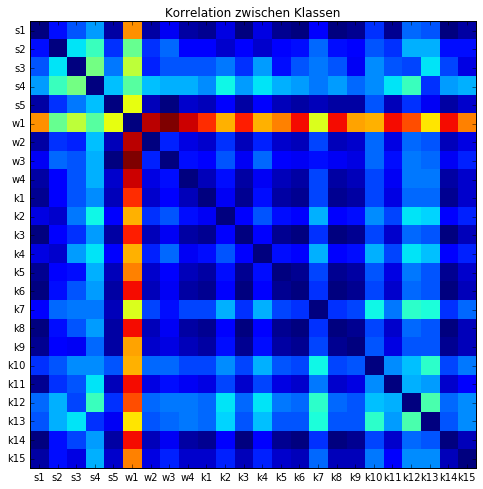

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))

classes = Tweet.get_all_keys()
y_pos = np.arange(len(classes))

error = np.full((len(classes), len(classes)), 0, dtype=int)
for tweet in tweets[:100]:
    for i, class_i in enumerate(classes):
        for j, class_j in enumerate(classes):
            error[i, j] += abs((tweet[class_i] - tweet[class_j]))
ax.set_yticks(y_pos)
ax.set_yticklabels(classes)
ax.set_xticks(y_pos)
ax.set_xticklabels(classes)
ax.set_title('Korrelation zwischen Klassen')
plt.imshow(error, interpolation='nearest')

plt.show()
